In [2]:
# In this project, we will use the world happiness report to try to work out what contributes most to 
# happiness in the happiest countries

# Import libraries and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
happy = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Happiness.csv")
happy.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [3]:
# Let's inspect the dataset for null values
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [4]:
# We do have some missing values - 8 in the corruption column and one in all of the others apart from
# standard deviation, the ranking and the country. Let's see where the missing values are
print(happy[happy.isna().any(axis=1)])



            Country (region)  Ladder  SD of Ladder  Positive affect  \
20      United Arab Emirates      21            65             43.0   
24                    Taiwan      25            37             17.0   
27              Saudi Arabia      28            93             49.0   
28                     Qatar      29            86              NaN   
36                   Bahrain      37            83             39.0   
45                    Kosovo      46           107             71.0   
50                    Kuwait      51            98             89.0   
63           Northern Cyprus      64            35            144.0   
75                 Hong Kong      76            33            105.0   
86              Turkmenistan      87             2            135.0   
92                     China      93            72             21.0   
100                   Jordan     101           127            112.0   
109  Palestinian Territories     110           110            128.0   
111   

In [5]:
# For one country, Qatar, we have very few values, and so we should drop this one altogether
happy.drop([28], inplace=True)

In [6]:
# For the other rows with null values, we can replace them with the mean for that column 
happy.fillna(happy.mean(), inplace=True)

In [7]:
happy.info() # Check that we now have no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         155 non-null    object 
 1   Ladder                   155 non-null    int64  
 2   SD of Ladder             155 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               155 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    155 non-null    float64
 10  Healthy life
expectancy  155 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [9]:
# We can now inspect the columns to see what each of them contain
for column in happy.columns:
    print(happy[column].describe())

count            155
unique           155
top       Kazakhstan
freq               1
Name: Country (region), dtype: object
count    155.000000
mean      78.819355
std       45.146870
min        1.000000
25%       40.500000
50%       79.000000
75%      117.500000
max      156.000000
Name: Ladder, dtype: float64
count    155.000000
mean      78.451613
std       45.319815
min        1.000000
25%       39.500000
50%       78.000000
75%      117.500000
max      156.000000
Name: SD of Ladder, dtype: float64
count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Positive affect, dtype: float64
count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Negative affect, dtype: float64
count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.50000

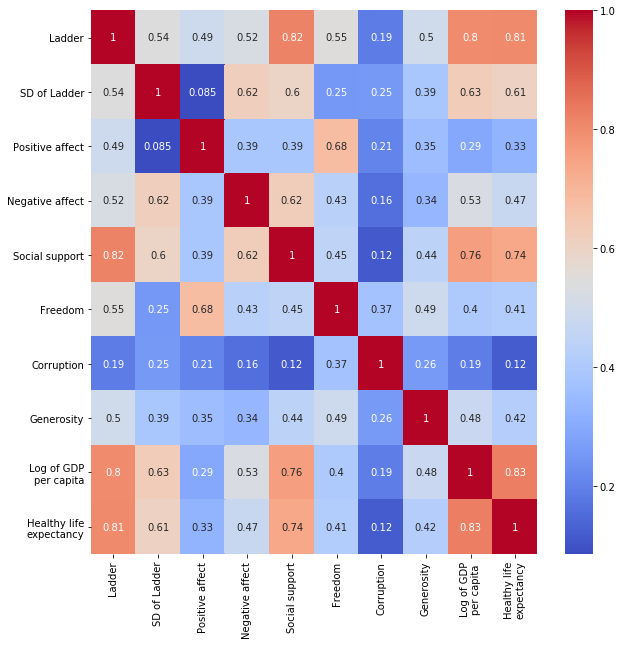

In [10]:
# We can see that from the similarties between the columns (apart from the name of the country) that
# what we have in each columns is the numbers 1-155 (or so), i.e. a ranking for each country, relative
# to the other countries, for how "well" they did on that measure.

# Let's see, then, what correlations we can find between these features, and what that might
# reveal about those countries
plt.figure(figsize=(10,10))
sns.heatmap(happy.corr(), cmap="coolwarm", annot=True)

In [26]:
# Strong correlations with "Ladder" mean the correlation between the importance of a certain feature
# to the happiness of the country and that country's overall position. The fact that these aren't all
# equal suggests that certain features are better indicators of overall happiness than others. The three
# most important, it would seem, are GDP per capita, healthy life expectancy and social support

# Given these correlations, we would hope to be able to predict quite accurately the relative happiness
# of a given country with just those three features. Let's see if we can using simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
features = ["Social support", "Log of GDP\nper capita", "Healthy life\nexpectancy"]
x = happy[features]
y = happy["Ladder"]
lr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
lr.fit(x_train, y_train)
print(lr.score(x_test,y_test))


0.893591236811228


In [29]:
# This is a pretty good score, and suggests that we can effectively predict the overall ranking of 
# a country using those three features

# We might expect, then, that the least happy countries would score lowly for these features. Let's
# see:
bottom_10 = happy[-10:]
for feature in features:
    average_position = bottom_10[feature].mean()
    print(average_position)

138.4
125.2
126.2


In [30]:
# So the average positions for social support, GDP per capita and healthy life expectancy were all low
# What about the other columns?
other_columns = ["Freedom", "Corruption", "Generosity"]
for column in other_columns:
    print(bottom_10[column].mean())

111.8
64.2
97.7


In [31]:
# These figures are, on average, quite a lot lower, which suggests that, in the worse off countries,
# the key things they are missing (as perceived by the people) are wealth (GDP), health (life expectancy)
# and support from government (social support)

# Conversely, what can we learn by looking at the happiest countries? Let's make a top_10 dataframe
# and explore it
top_10 = happy[:10]
features = ["Social support", "Log of GDP\nper capita", "Healthy life\nexpectancy", "Freedom", "Corruption", "Generosity"]
for feature in features:
    print(str(feature), " average position: ", top_10[feature].mean())

Social support  average position:  11.9
Log of GDP
per capita  average position:  15.2
Healthy life
expectancy  average position:  15.1
Freedom  average position:  10.4
Corruption  average position:  12.0
Generosity  average position:  17.0


In [ ]:
# In the top_10, then, life satisfaction (relative to those in other countries) relates more to freedom,
# social support and a lack of corruption than other features.